# Decision Tree and Random Forest

## Decision Tree - Intuition

### Decision Trees are supervised Machine Learning techniques where the data is split according to a certain condition / parameter.

**Let us assume we want to classify whether a customer could retire or not based on their savings and age.**
1. Tree type classfication
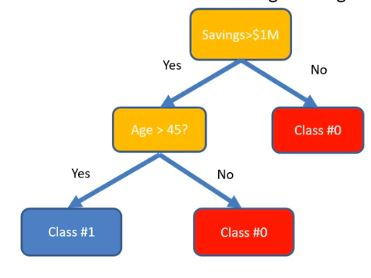
2. Graphical classification
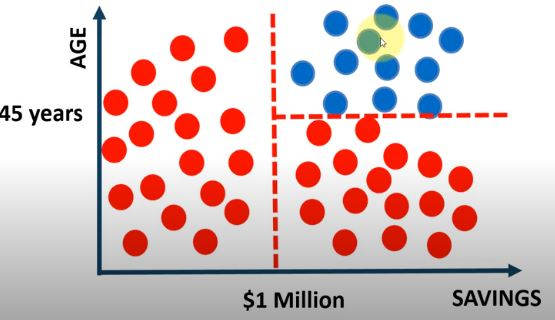

## Decision Tree - Definitions
- The tree consists of **decision nodes** and **leaves**.
- Leaves are the decisions or final outcomes.
- Decision nodes are where the data is split based on a certain attribute.
- Objective is to minimize the entropy which provides the optimum split

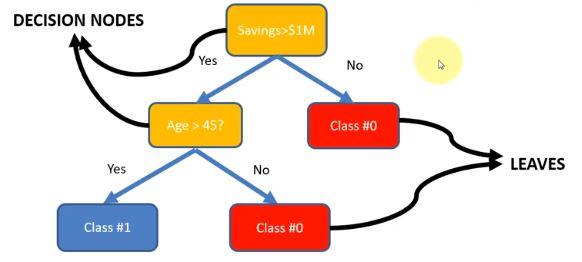

## Decision Tree - Customer Segmentation

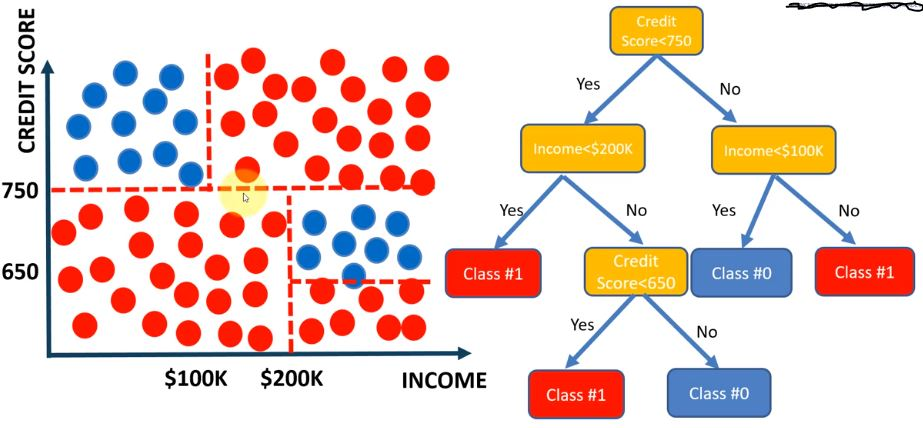

## Random Forest - Intuition

- Random Forest Classifer is a type of **emsemble algorithm**
- It creates a set of decision trees from randomly selected subset of training set
- It then **combines votes** from different decision trees to decide the final class of the test object

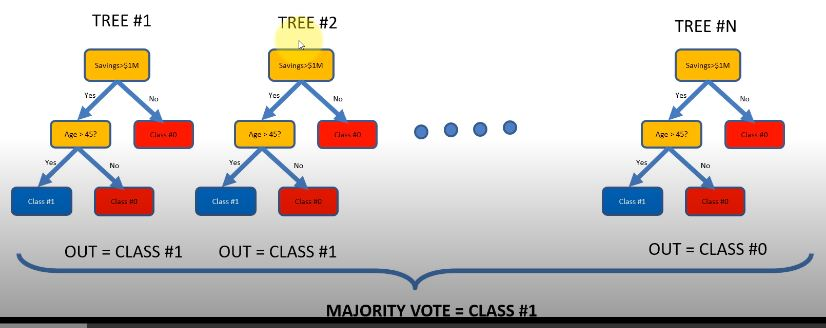

## Random Forest - Why and How?
- It overcomes the issues with single decision trees by reducing the effect of noise.
- Overcomes **overfitting problem** by taking **average of all the predictions**, cancelling out biases.
- Suppose training set: [X1, X2, X3, X4] with labels: \[L1, L2, L3, L4]
- Random Forest creates three decision trees taking inputs as follows: [X1,X2,X3],[X1,X2,X4],[X2,X3,X4]
- Example: Combining votes from a pool of experts, each will bring their own experience and background to solve the problem resulting in a better outcome.

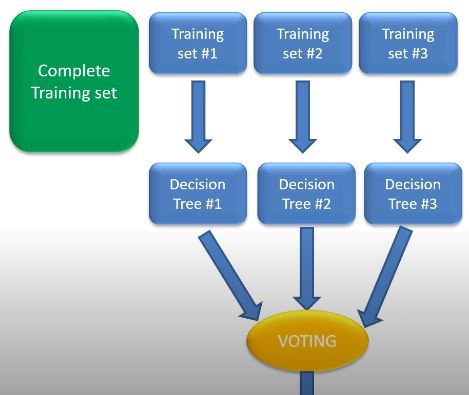

## Step 1: Problem Statement

- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews

## Step 2: Importing Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
my_alexa = pd.read_csv('amazon_alexa.tsv',sep='\t')

In [ ]:
my_alexa.head(5)

In [ ]:
my_alexa.tail(5)

In [ ]:
my_alexa.info()

In [ ]:
my_alexa.describe()

In [ ]:
my_alexa.keys()

In [ ]:
my_alexa['verified_reviews']

In [ ]:
my_alexa['variation'].unique()

## Step 3: Visualizing the Data

In [ ]:
my_alexa['feedback'].unique() # 1 is Positive Feedback and 0 is Negative Feedback

In [ ]:
postive_feedback = my_alexa[my_alexa['feedback'] == 1]

In [ ]:
postive_feedback

In [ ]:
postive_feedback.info()

In [ ]:
negative_feedback = my_alexa[my_alexa['feedback'] == 0]

In [ ]:
negative_feedback

In [ ]:
negative_feedback.info()

In [ ]:
sns.countplot(my_alexa['feedback'],label='Count')

In [ ]:
sns.countplot(my_alexa['rating'],label='Count')

In [ ]:
my_alexa['rating'].hist(bins=5)

In [ ]:
plt.figure(figsize=(40,15))
sns.barplot(x='variation',y='rating',data=my_alexa, palette='deep')

## Step 4: Data Cleaning / Feature Engineering

In [ ]:
# Drop the 'date' and 'rating' as it is not required for analysis
# Will be using 'variation' and 'verified reivews' and predict the 'feedback'

my_alexa = my_alexa.drop(['date','rating'],axis=1)

In [ ]:
my_alexa

In [ ]:
# Encoding the variation / Dummy variables for variation
# Avoiding the Dummy Trap
variation_dummy = pd.get_dummies(my_alexa['variation'], drop_first = True)

In [ ]:
variation_dummy

In [ ]:
my_alexa.drop(['variation'],axis=1,inplace=True)

In [ ]:
my_alexa

In [ ]:
my_alexa = pd.concat([my_alexa,variation_dummy],axis = 1)

In [ ]:
my_alexa

In [ ]:
# Count Vectorizer: most basic ways we can represent text data numerically: 
# one-hot encoding (or count vectorization). 

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
alexa_cv = vectorizer.fit_transform(my_alexa['verified_reviews'])

In [ ]:
alexa_cv.shape

In [ ]:
print(vectorizer.get_feature_names())

In [ ]:
print(alexa_cv.toarray())

In [ ]:
my_alexa.drop(['verified_reviews'],axis=1,inplace = True)

In [ ]:
my_alexa

In [ ]:
encoded_reviews = pd.DataFrame(alexa_cv.toarray())

In [ ]:
my_alexa = pd.concat([my_alexa,encoded_reviews],axis = 1)

In [ ]:
my_alexa

In [ ]:
X = my_alexa.drop(['feedback'],axis=1)

In [ ]:
X.shape

In [ ]:
y = my_alexa['feedback']

In [ ]:
y.shape

## Step 5: Model Training

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier(n_estimators=100,criterion = 'entropy')
randomforest_classifier.fit(X_train,y_train)

## Step 6: Evaluating the Model

In [ ]:
y_predict_train = randomforest_classifier.predict(X_train)

In [ ]:
y_predict_train

In [ ]:
cm = confusion_matrix(y_train,y_predict_train)

In [ ]:
sns.heatmap(cm,annot = True)

In [ ]:
print(cm)
print(classification_report(y_train,y_predict_train))

Classification Rate/Accuracy:
Accuracy = (TP + TN) / (TP + TN + FP + FN)= (2313+192) /(2313+11+192+4)= 0.994

Precision: Precsion tells us about when it predicts yes, how often is it correct.
Precision = TP / (TP + FP)=2313/ (2313+11)=0.995

Recall: Recall gives us an idea about when it’s actually yes, how often does it predict yes.
Recall=TP / (TP + FN)=2313/(2313+4)=0.998

F-measure:
Fmeasure=(2*Recall*Precision)/(Recall+Presision)=(2*0.995*0.998)/(0.995+0.998)=0.996

In [ ]:
y_predict = randomforest_classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_predict)
#print(cm)

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
print(cm)
print(classification_report(y_test,y_predict))

Classification Rate/Accuracy:
Accuracy = (TP + TN) / (TP + TN + FP + FN)= (576+11) /(576+11+43+0)= 0.931

Recall: Recall gives us an idea about when it’s actually yes, how often does it predict yes.
Recall=TP / (TP + FN)=576/(576+0)=0.990

Precision: Precsion tells us about when it predicts yes, how often is it correct.
Precision = TP / (TP + FP)=576/ (576+43)=0.930

F-measure:
Fmeasure=(2*Recall*Precision)/(Recall+Presision)=(2*0.990*0.930)/(0.990+0.930)=0.964

## Step 7: Improve the Model

In [ ]:
my_alexa = pd.read_csv('amazon_alexa.tsv', sep='\t')

In [ ]:
my_alexa = pd.concat([my_alexa,pd.DataFrame(alexa_cv.toarray())],axis = 1)

In [ ]:
my_alexa.shape

In [ ]:
my_alexa['length'] = my_alexa['verified_reviews'].apply(len)

In [ ]:
my_alexa

In [ ]:
X = my_alexa.drop(['rating','date','variation','verified_reviews','feedback'],axis=1)

In [ ]:
X

In [ ]:
y = my_alexa['feedback']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier(n_estimators=300,criterion = 'entropy')
randomforest_classifier.fit(X_train,y_train)

y_predict = randomforest_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

In [ ]:
print(cm)
print(classification_report(y_test,y_predict))

# End of Classification